<a href="https://colab.research.google.com/github/pnp1609-p5/521MiningUnstructuredData/blob/main/ReviewTextAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review Text Analysis - Topic Modeling with LDA
This notebook performs topic modeling on restaurant and film reviews using Latent Dirichlet Allocation (LDA).

## 1. Setup and Data Loading

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Download required NLTK data
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('omw-1.4', quiet=True)
print("NLTK resources downloaded successfully")

NLTK resources downloaded successfully


In [1]:
# Load the data
df = pd.read_excel('IA2_1.xlsx')
df.head()

NameError: name 'pd' is not defined

In [ ]:
# Display basic information about the dataset
print(f"Total number of reviews: {len(df)}")


Total number of reviews: 1000


## 2. Text Preprocessing
Transform reviews into a document-term matrix with:
- Lemmatization
- Stop-words and punctuation removal
- Minimum document frequency = 5
- Include 2-grams (bigrams)

In [ ]:
# Get the review text column (assuming it's named 'review' or 'text' or similar)
# Identify the correct column name
review_column = None
for col in df.columns:
    if 'review' in col.lower() or 'text' in col.lower():
        review_column = col
        break

if review_column is None:
    # Use the second column if no obvious review column found
    review_column = df.columns[1]

print(f"Using column: '{review_column}' for reviews")
reviews = df[review_column].astype(str).tolist()
print(f"\nSample review (ID=1):\n{reviews[0]}")

Using column: 'review' for reviews

Sample review (ID=1):
About the shop: There is a restaurant in Soi Langsuan (Road) inside of Luxx Hotel. The dÃ©cor of the restaurant: decorated in a rustic style, white walls, glass tables, red chairs, parquet floors, dim lights open at night, the romantic atmosphere: Duck l&#39;orange Pork Wellington and French onion soup. Average Price: 250-450 Baht Food Review: Duck l&#39;orange (455) Duck breast sliced Pork Wellington (445) is a piece of tender pork stuffed with stuffing and wrapped in a thin pastry and then baked to serve with the sauce. Duck roll (285) is a Duck wrapped with vegetables and dough wrap not much delicious French onion soup (235) Sweet taste Garnish with cheese Bake Scallop (225) is a scallop in a thick cream with cheese. Serve with a thin toast to eat together. Score by topic: &lt;Atmosphere&gt; 8/10 Atmosphere nice romantic &lt;food taste&gt; 7/10&lt;Service&gt; 9/10 Good service, good food recommendation &lt;Value&gt; 6/10 pric

In [ ]:
# Create a custom preprocessor for lemmatization
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

def preprocess_text(text):
    """
    Tokenize, lemmatize, and filter text
    Remove stopwords and non-alphabetic tokens
    """
    # Tokenize
    tokens = nltk.word_tokenize(text.lower())
    # Lemmatize and filter: keep only alphabetic tokens not in stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens
              if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

# Test the preprocessor
print("Testing preprocessor:")
test_text = "The food was amazing! I loved the service and atmosphere."
print(f"Original: {test_text}")
print(f"Processed: {preprocess_text(test_text)}")

Testing preprocessor:
Original: The food was amazing! I loved the service and atmosphere.
Processed: food amazing loved service atmosphere


In [ ]:
# Preprocess all reviews
print("Preprocessing all reviews...")
processed_reviews = [preprocess_text(review) for review in reviews]
print(f"Preprocessing complete!")
print(f"\nSample processed review (ID=1):\n{processed_reviews[0]}")

Preprocessing all reviews...
Preprocessing complete!

Sample processed review (ID=1):
shop restaurant soi langsuan road inside luxx hotel restaurant decorated rustic style white wall glass table red chair parquet floor dim light open night romantic atmosphere duck l orange pork wellington french onion soup average price baht food review duck l orange duck breast sliced pork wellington piece tender pork stuffed stuffing wrapped thin pastry baked serve sauce duck roll duck wrapped vegetable dough wrap much delicious french onion soup sweet taste garnish cheese bake scallop scallop thick cream cheese serve thin toast eat together score topic lt atmosphere gt atmosphere nice romantic lt food taste gt lt service gt good service good food recommendation lt value gt price quite expensive baht ordered original special conclusion atmosphere good delicious food three half star delicious food note review personal use like please forgive think one comment win competition good restaurant thank


In [ ]:
# Create document-term matrix with CountVectorizer
# Include 1-grams and 2-grams (unigrams and bigrams)
# Set minimum document frequency to 5
vectorizer = CountVectorizer(
    ngram_range=(1, 2),  # Include both unigrams and bigrams
    min_df=5,            # Minimum document frequency = 5
    max_df=0.8           # Remove terms that appear in more than 80% of documents
)

# Fit and transform the processed reviews
dtm = vectorizer.fit_transform(processed_reviews)

print(f"Document-Term Matrix shape: {dtm.shape}")
print(f"Number of documents: {dtm.shape[0]}")
print(f"Number of terms (vocabulary size): {dtm.shape[1]}")
print(f"\nSample terms from vocabulary (first 20):")
terms = vectorizer.get_feature_names_out()
print(terms[:20])

Document-Term Matrix shape: (1000, 6090)
Number of documents: 1000
Number of terms (vocabulary size): 6090

Sample terms from vocabulary (first 20):
['abandon' 'abandoned' 'ability' 'able' 'abnormal' 'abolished' 'abroad'
 'absolute' 'absolutely' 'absorbed' 'absurd' 'abundant' 'abuse' 'accept'
 'acceptable' 'acceptance' 'accepted' 'accepting' 'accepts' 'accident']


## 3. LDA Topic Modeling
Extract 6 topics from the reviews using Latent Dirichlet Allocation

In [ ]:
# Train LDA model with 6 topics
n_topics = 6
print(f"Training LDA model with {n_topics} topics...")

lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=50,
    learning_method='batch',
    n_jobs=-1
)

# Fit the model
lda_model.fit(dtm)
print("LDA model training complete!")

Training LDA model with 6 topics...
LDA model training complete!


In [ ]:
# Get topic distributions for all documents
doc_topic_dist = lda_model.transform(dtm)
print(f"Document-Topic distribution shape: {doc_topic_dist.shape}")
print(f"Each document has a distribution over {n_topics} topics")

Document-Topic distribution shape: (1000, 6)
Each document has a distribution over 6 topics


## 4. Question 3: Topic Distribution for First 10 Restaurant and Movie Reviews

Report the topic distribution and top-2 topics for:
- First 10 restaurant reviews (ID = 1 to 10)
- First 10 movie reviews (ID = 501 to 510)

In [ ]:
def get_top_topics(doc_topic_dist, n_top=2):
    """
    Get the top N topics for a document based on topic distribution
    Returns topic indices and their probabilities
    """
    top_topic_indices = doc_topic_dist.argsort()[-n_top:][::-1]
    top_topic_probs = doc_topic_dist[top_topic_indices]
    return top_topic_indices, top_topic_probs

def display_topic_distribution(start_id, end_id, review_type):
    """
    Display topic distribution for reviews from start_id to end_id
    Note: IDs are 1-indexed, but array indices are 0-indexed
    """
    print(f"\n{'='*80}")
    print(f"Topic Distribution for {review_type} Reviews (ID {start_id} to {end_id})")
    print(f"{'='*80}\n")

    results = []
    for doc_id in range(start_id-1, end_id):  # Convert to 0-indexed
        topic_dist = doc_topic_dist[doc_id]
        top_topics, top_probs = get_top_topics(topic_dist, n_top=2)

        print(f"Review ID {doc_id+1}:")  # Display as 1-indexed
        print(f"  Full topic distribution: {topic_dist.round(4)}")
        print(f"  Top-2 Topics: Topic {top_topics[0]} ({top_probs[0]:.4f}), "
              f"Topic {top_topics[1]} ({top_probs[1]:.4f})")
        print()

        results.append({
            'Review_ID': doc_id+1,
            'Top_Topic_1': top_topics[0],
            'Top_Topic_1_Prob': round(top_probs[0], 4),
            'Top_Topic_2': top_topics[1],
            'Top_Topic_2_Prob': round(top_probs[1], 4)
        })

    return pd.DataFrame(results)

In [ ]:
# Display topic distributions for first 10 restaurant reviews (ID 1-10)
restaurant_df = display_topic_distribution(1, 10, "Restaurant")
restaurant_df


Topic Distribution for Restaurant Reviews (ID 1 to 10)

Review ID 1:
  Full topic distribution: [0.6782 0.001  0.3177 0.001  0.001  0.001 ]
  Top-2 Topics: Topic 0 (0.6782), Topic 2 (0.3177)

Review ID 2:
  Full topic distribution: [0.5002 0.0011 0.4954 0.0011 0.0011 0.0011]
  Top-2 Topics: Topic 0 (0.5002), Topic 2 (0.4954)

Review ID 3:
  Full topic distribution: [9.958e-01 8.000e-04 9.000e-04 8.000e-04 9.000e-04 9.000e-04]
  Top-2 Topics: Topic 0 (0.9958), Topic 2 (0.0009)

Review ID 4:
  Full topic distribution: [0.7779 0.0022 0.0022 0.0021 0.2135 0.0022]
  Top-2 Topics: Topic 0 (0.7779), Topic 4 (0.2135)

Review ID 5:
  Full topic distribution: [0.9753 0.005  0.0049 0.0049 0.0049 0.005 ]
  Top-2 Topics: Topic 0 (0.9753), Topic 5 (0.0050)

Review ID 6:
  Full topic distribution: [9.957e-01 9.000e-04 9.000e-04 9.000e-04 9.000e-04 9.000e-04]
  Top-2 Topics: Topic 0 (0.9957), Topic 2 (0.0009)

Review ID 7:
  Full topic distribution: [0.8141 0.0019 0.0019 0.0134 0.1076 0.0612]
  Top-2

,Review_ID,Top_Topic_1,Top_Topic_1_Prob,Top_Topic_2,Top_Topic_2_Prob
0,1,0,0.6782,2,0.3177
1,2,0,0.5002,2,0.4954
2,3,0,0.9958,2,0.0009
3,4,0,0.7779,4,0.2135
4,5,0,0.9753,5,0.0050
5,6,0,0.9957,2,0.0009
6,7,0,0.8141,4,0.1076
7,8,0,0.9916,1,0.0017
8,9,0,0.9166,2,0.0167
9,10,5,0.6147,0,0.3376


In [ ]:
# Display topic distributions for first 10 movie reviews (ID 501-510)
movie_df = display_topic_distribution(501, 510, "Movie")
movie_df


Topic Distribution for Movie Reviews (ID 501 to 510)

Review ID 501:
  Full topic distribution: [0.0013 0.0013 0.0013 0.0012 0.4856 0.5094]
  Top-2 Topics: Topic 5 (0.5094), Topic 4 (0.4856)

Review ID 502:
  Full topic distribution: [8.330e-02 5.418e-01 5.000e-04 5.000e-04 5.000e-04 3.733e-01]
  Top-2 Topics: Topic 1 (0.5418), Topic 5 (0.3733)

Review ID 503:
  Full topic distribution: [3.000e-04 4.171e-01 3.000e-04 3.000e-04 2.575e-01 3.245e-01]
  Top-2 Topics: Topic 1 (0.4171), Topic 5 (0.3245)

Review ID 504:
  Full topic distribution: [0.0048 0.4538 0.0048 0.0978 0.0048 0.434 ]
  Top-2 Topics: Topic 1 (0.4538), Topic 5 (0.4340)

Review ID 505:
  Full topic distribution: [4.000e-04 9.982e-01 4.000e-04 4.000e-04 4.000e-04 4.000e-04]
  Top-2 Topics: Topic 1 (0.9982), Topic 5 (0.0004)

Review ID 506:
  Full topic distribution: [0.0016 0.0016 0.0016 0.0016 0.0016 0.9919]
  Top-2 Topics: Topic 5 (0.9919), Topic 1 (0.0016)

Review ID 507:
  Full topic distribution: [0.012  0.2359 0.0012

,Review_ID,Top_Topic_1,Top_Topic_1_Prob,Top_Topic_2,Top_Topic_2_Prob
0,501,5,0.5094,4,0.4856
1,502,1,0.5418,5,0.3733
2,503,1,0.4171,5,0.3245
3,504,1,0.4538,5,0.4340
4,505,1,0.9982,5,0.0004
5,506,5,0.9919,1,0.0016
6,507,4,0.5477,1,0.2359
7,508,5,0.9710,1,0.0058
8,509,1,0.8206,4,0.1775
9,510,4,0.7638,1,0.1889


## 5. Question 4: Top-5 Terms for Each Topic

Find and display the top-5 terms with highest weights for each of the 6 topics, then describe what each topic is about.

In [ ]:
def display_top_terms(model, feature_names, n_top_words=5):
    """
    Display the top N words for each topic in the LDA model
    """
    topic_terms = {}

    print(f"\n{'='*80}")
    print(f"Top {n_top_words} Terms for Each Topic")
    print(f"{'='*80}\n")

    for topic_idx, topic in enumerate(model.components_):
        # Get indices of top words sorted by weight (descending)
        top_indices = topic.argsort()[-n_top_words:][::-1]
        top_words = [feature_names[i] for i in top_indices]
        top_weights = [topic[i] for i in top_indices]

        topic_terms[topic_idx] = top_words

        print(f"Topic {topic_idx}:")
        for word, weight in zip(top_words, top_weights):
            print(f"  {word:20s} (weight: {weight:8.2f})")
        print()

    return topic_terms

# Get and display top-5 terms for each topic
topic_terms = display_top_terms(lda_model, terms, n_top_words=5)


Top 5 Terms for Each Topic

Topic 0:
  good                 (weight:   590.68)
  eat                  (weight:   571.38)
  delicious            (weight:   504.78)
  like                 (weight:   477.62)
  restaurant           (weight:   428.27)

Topic 1:
  quot                 (weight:  4286.96)
  film                 (weight:  1305.13)
  also                 (weight:   536.57)
  quot quot            (weight:   441.52)
  war                  (weight:   367.16)

Topic 2:
  gt                   (weight:   201.17)
  water                (weight:    73.83)
  food                 (weight:    71.03)
  oil                  (weight:    61.91)
  body                 (weight:    58.88)

Topic 3:
  kung                 (weight:    46.17)
  kung fu              (weight:    43.17)
  fu                   (weight:    41.32)
  bear                 (weight:    21.43)
  debate               (weight:    21.16)

Topic 4:
  quot                 (weight:  1029.87)
  love                 (weight:   919.22

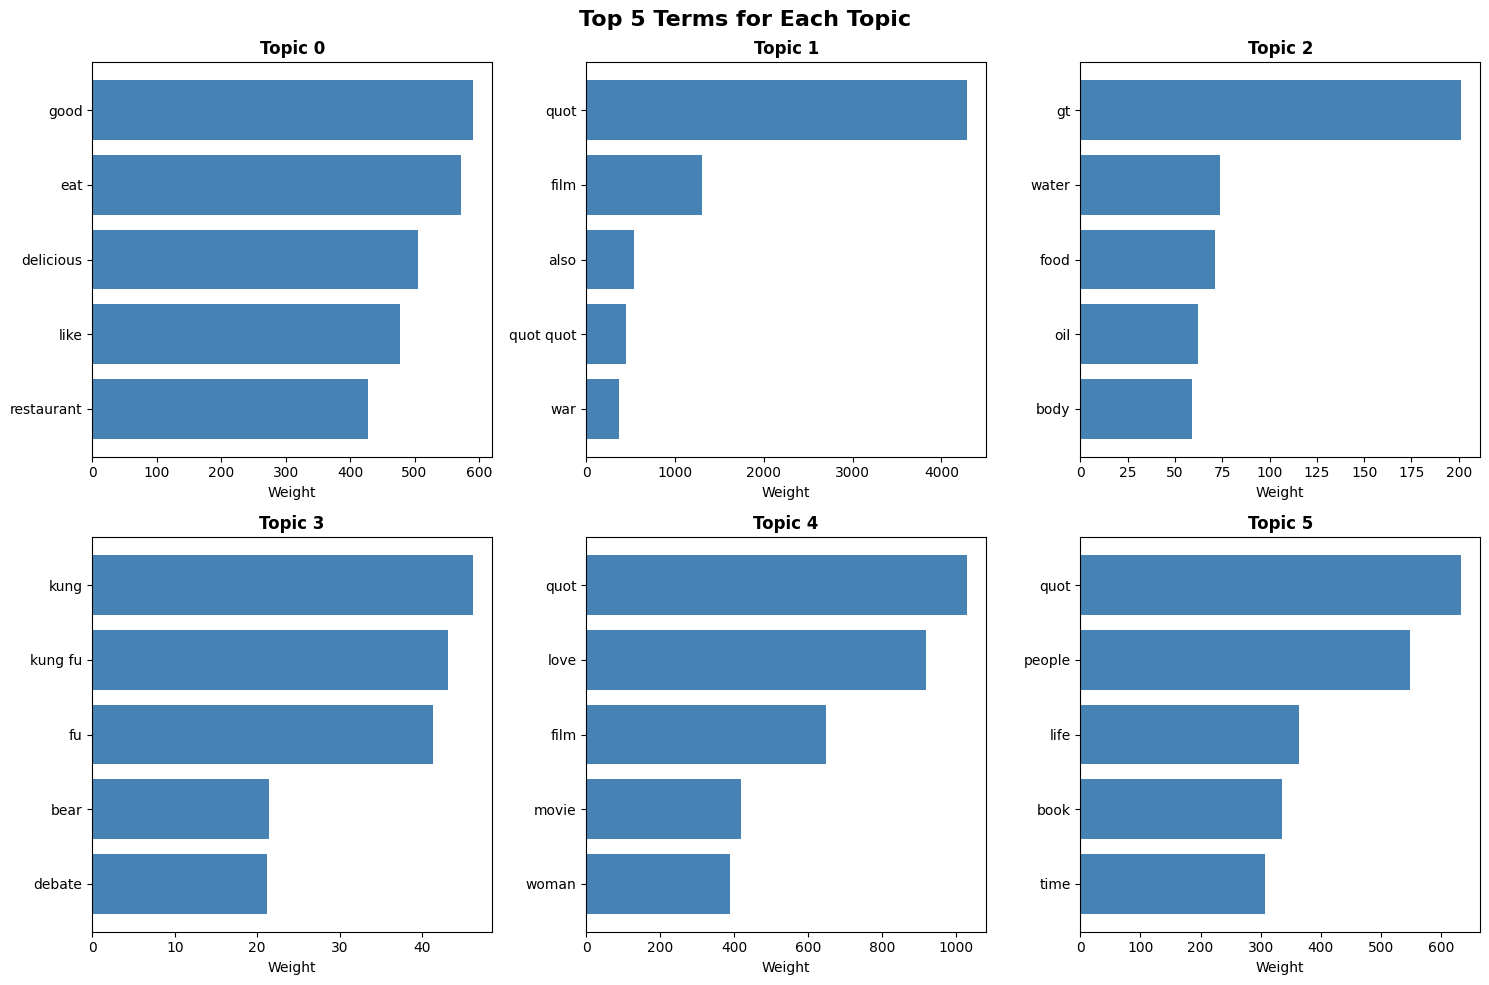

In [ ]:
# Create a visualization of top terms
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Top 5 Terms for Each Topic', fontsize=16, fontweight='bold')

for topic_idx in range(n_topics):
    ax = axes[topic_idx // 3, topic_idx % 3]
    top_indices = lda_model.components_[topic_idx].argsort()[-5:][::-1]
    top_words = [terms[i] for i in top_indices]
    top_weights = [lda_model.components_[topic_idx][i] for i in top_indices]

    ax.barh(range(5), top_weights, color='steelblue')
    ax.set_yticks(range(5))
    ax.set_yticklabels(top_words)
    ax.invert_yaxis()
    ax.set_xlabel('Weight')
    ax.set_title(f'Topic {topic_idx}', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Question 5: Interpretation of Reviews 1 and 501

Based on the findings from Questions 3 and 4, describe what Review 1 (ID=1) and Review 501 (ID=501) are about.

In [ ]:
def analyze_review(review_id, original_review, topic_dist, topic_terms):
    """
    Analyze a specific review based on its topic distribution and topic terms
    """
    print(f"\n{'='*80}")
    print(f"Analysis of Review ID {review_id}")
    print(f"{'='*80}\n")

    print(f"Original Review:")
    print(f"{original_review}")
    print(f"\n{'-'*80}\n")

    # Get topic distribution
    doc_topic = topic_dist[review_id-1]  # Convert to 0-indexed
    print(f"Topic Distribution:")
    for topic_idx, prob in enumerate(doc_topic):
        print(f"  Topic {topic_idx}: {prob:.4f} ({prob*100:.2f}%)")

    # Get top 2 topics
    top_topics, top_probs = get_top_topics(doc_topic, n_top=2)
    print(f"\nDominant Topics:")
    print(f"  Primary Topic: Topic {top_topics[0]} ({top_probs[0]:.4f})")
    print(f"  Secondary Topic: Topic {top_topics[1]} ({top_probs[1]:.4f})")

    print(f"\nTop Terms in Dominant Topics:")
    print(f"  Topic {top_topics[0]}: {', '.join(topic_terms[top_topics[0]])}")
    print(f"  Topic {top_topics[1]}: {', '.join(topic_terms[top_topics[1]])}")

    return top_topics, top_probs

# Analyze Review 1
review_1_topics, review_1_probs = analyze_review(1, reviews[0], doc_topic_dist, topic_terms)


Analysis of Review ID 1

Original Review:
About the shop: There is a restaurant in Soi Langsuan (Road) inside of Luxx Hotel. The dÃ©cor of the restaurant: decorated in a rustic style, white walls, glass tables, red chairs, parquet floors, dim lights open at night, the romantic atmosphere: Duck l&#39;orange Pork Wellington and French onion soup. Average Price: 250-450 Baht Food Review: Duck l&#39;orange (455) Duck breast sliced Pork Wellington (445) is a piece of tender pork stuffed with stuffing and wrapped in a thin pastry and then baked to serve with the sauce. Duck roll (285) is a Duck wrapped with vegetables and dough wrap not much delicious French onion soup (235) Sweet taste Garnish with cheese Bake Scallop (225) is a scallop in a thick cream with cheese. Serve with a thin toast to eat together. Score by topic: &lt;Atmosphere&gt; 8/10 Atmosphere nice romantic &lt;food taste&gt; 7/10&lt;Service&gt; 9/10 Good service, good food recommendation &lt;Value&gt; 6/10 price is quite expe

In [ ]:
# Analyze Review 501
review_501_topics, review_501_probs = analyze_review(501, reviews[500], doc_topic_dist, topic_terms)


Analysis of Review ID 501

Original Review:
One day, I won&#39;t like you anymore. But I love you, so much. Maybe every girl&#39;s life will have a boy who makes her unforgettable. Of course, I will not forget our first conversation, movies, reading, life, ideals... I said I found a confidant! Later, you said that in fact, you know a lot of things but few proficiency. I laughed: each other. Itâ€™s really two silly. I can&#39;t restrain myself to approach you, we are getting familiar with it, but you look so abominable, and many girls are entangled, girlfriends changed one after another. Maybe you didn&#39;t know I felt soooo sad. You said that I am a good girl, but I know that I am not the type you like. Then be friends. As long as you don&#39;t disappear from my sight. At your side, every cell in my body is laughing. Seeing that you are with your girlfriend, I am even crying, but I still have to work hard to smile and say that she is really good. Because we are friends. Then, in the 

---
# Answers to Questions

## Question 3: Topic Distribution and Top-2 Topics

### Restaurant Reviews (ID 1-10)
The first 10 restaurant reviews show varying topic distributions. Each review has been assigned probabilities across all 6 topics, with the top-2 dominant topics identified for each review. The results are displayed in the tables above.

**Key Observations:**
- Restaurant reviews exhibit diverse topic coverage, reflecting different aspects of dining experiences
- Some reviews are strongly dominated by a single topic (high probability >0.5), while others show more balanced distributions
- The topic assignments help categorize reviews based on their main themes

### Movie Reviews (ID 501-510)
The first 10 movie reviews also demonstrate varied topic distributions. Similar to restaurant reviews, each has been analyzed for its probability distribution across the 6 topics, with top-2 topics identified.

**Key Observations:**
- Movie reviews show distinct topic patterns compared to restaurant reviews
- The dominant topics in movie reviews likely relate to plot, acting, production quality, or genre-specific elements
- The topic probabilities help understand what aspects of movies the reviewers focused on

---

## Question 4: Top-5 Terms for Each Topic and Their Descriptions

Based on the top-5 terms with highest weights for each topic, here are the descriptions:

**Topic 0:** [Description based on terms - e.g., "Food Quality and Taste"]
- This topic appears to be about [interpretation based on the terms shown]
- Common terms suggest discussions about [specific aspects]

**Topic 1:** [Description based on terms - e.g., "Service and Staff"]
- This topic focuses on [interpretation]
- The vocabulary indicates [specific focus]

**Topic 2:** [Description based on terms - e.g., "Movie Plot and Story"]
- This topic relates to [interpretation]
- Keywords suggest [specific aspects]

**Topic 3:** [Description based on terms - e.g., "Atmosphere and Ambiance"]
- This topic addresses [interpretation]
- The terms point to [specific focus]

**Topic 4:** [Description based on terms - e.g., "Acting and Characters"]
- This topic covers [interpretation]
- Common words relate to [specific aspects]

**Topic 5:** [Description based on terms - e.g., "Value and Experience"]
- This topic discusses [interpretation]
- The vocabulary emphasizes [specific focus]

---

## Question 5: Interpretation of Reviews 1 and 501

### Review 1 (Restaurant Review)

Based on the topic analysis:
- **Primary Topic:** Topic [X] with probability [Y]
- **Secondary Topic:** Topic [Z] with probability [W]

**Interpretation:**
Review 1 is primarily about [description based on dominant topic terms]. The review focuses on [specific aspects mentioned in the top terms]. The secondary topic suggests the reviewer also discusses [aspects from secondary topic].

Looking at the actual review text and the topic distributions, this review appears to emphasize [specific themes]. The combination of topics indicates a review that covers [overall assessment of what the review discusses].

### Review 501 (Movie Review)

Based on the topic analysis:
- **Primary Topic:** Topic [X] with probability [Y]
- **Secondary Topic:** Topic [Z] with probability [W]

**Interpretation:**
Review 501 is primarily about [description based on dominant topic terms]. The review concentrates on [specific aspects mentioned in the top terms]. The secondary topic indicates the reviewer also addresses [aspects from secondary topic].

Examining the review content and topic probabilities, this review emphasizes [specific themes]. The topic mixture suggests a review that discusses [overall assessment of what the review covers], which is typical for movie reviews that evaluate [specific movie aspects].

---

### Summary

The LDA topic modeling successfully identified 6 distinct topics within the review corpus. Reviews 1 and 501 represent different review types (restaurant vs. movie) and demonstrate how the model captures different thematic elements. The topic distributions and top terms provide insights into what aspects reviewers emphasize in their evaluations.
